In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from datetime import datetime
from dateutil.parser import parse

In [3]:
df = pd.read_csv('2000.csv')

In [63]:
df.head()

,Unnamed: 0,LOAN_ID,ORIG_CHN,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,...,FCE_DTE,FCE_UPB,F180_DTE,F180_UPB,VinYr,ActYr,DispYr,MODIR_COST,MODFB_COST,MODTOT_COST
0,1,100007365142,R,8.000,75000.0,360,12/1999,02/2000,79.0,79.0,...,2019-01-01,NaN,2019-01-01,NaN,1999,2003,NO DISP_DT,0.0,0.0,0.0
1,2,100007386460,B,7.875,55000.0,180,01/2000,03/2000,69.0,69.0,...,2019-01-01,NaN,2019-01-01,NaN,2000,2001,NO DISP_DT,0.0,0.0,0.0
2,3,100011322040,C,7.750,123000.0,360,11/1999,01/2000,80.0,80.0,...,2019-01-01,NaN,2019-01-01,NaN,1999,2003,NO DISP_DT,0.0,0.0,0.0
3,4,100015192562,R,8.500,51000.0,360,02/2000,04/2000,95.0,95.0,...,2019-01-01,NaN,2019-01-01,NaN,2000,2004,NO DISP_DT,0.0,0.0,0.0
4,5,100015874399,C,8.750,242000.0,360,02/2000,04/2000,95.0,95.0,...,2019-01-01,NaN,2019-01-01,NaN,2000,2002,NO DISP_DT,0.0,0.0,0.0


In [86]:
df['FCE_DTE'].replace(np.nan, '2019-01-01', regex = True, inplace = True)
df['F180_DTE'].replace(np.nan, '2019-01-01', regex = True, inplace = True)
fce_dte = df['FCE_DTE'].tolist()
f180_dte = df['F180_DTE'].tolist()

In [88]:
fce_dte_time = [datetime.strptime(item, '%Y-%m-%d') for item in fce_dte]
f180_dte_time = [datetime.strptime(item, '%Y-%m-%d') for item in f180_dte]

In [103]:
time_period = list()
for i in range(17):
    for j in range(1,5):
        time_period.append(str(2001+i) + '-' + str(1 + (j-1)*3) + '-01')
time_period.append('2018-01-01')

In [104]:
time_period = [datetime.strptime(item, '%Y-%m-%d') for item in time_period]

In [117]:
fce_survival = list()
for i in range(len(time_period)):
    percentage = 1 - sum([fce_dte_time[j] < time_period[i] for j in range(len(fce_dte_time))]) / len(fce_dte_time)
    fce_survival.append(percentage)

In [119]:
f180_survival = list()
for i in range(len(time_period)):
    percentage = 1 - sum([f180_dte_time[j] < time_period[i] for j in range(len(f180_dte_time))]) / len(f180_dte_time)
    f180_survival.append(percentage)

In [129]:
tick = list()
for item in time_period:
    if item.month == 1:
        tick.append(item.year)
    else:
        tick.append('')

<IPython.core.display.Javascript object>


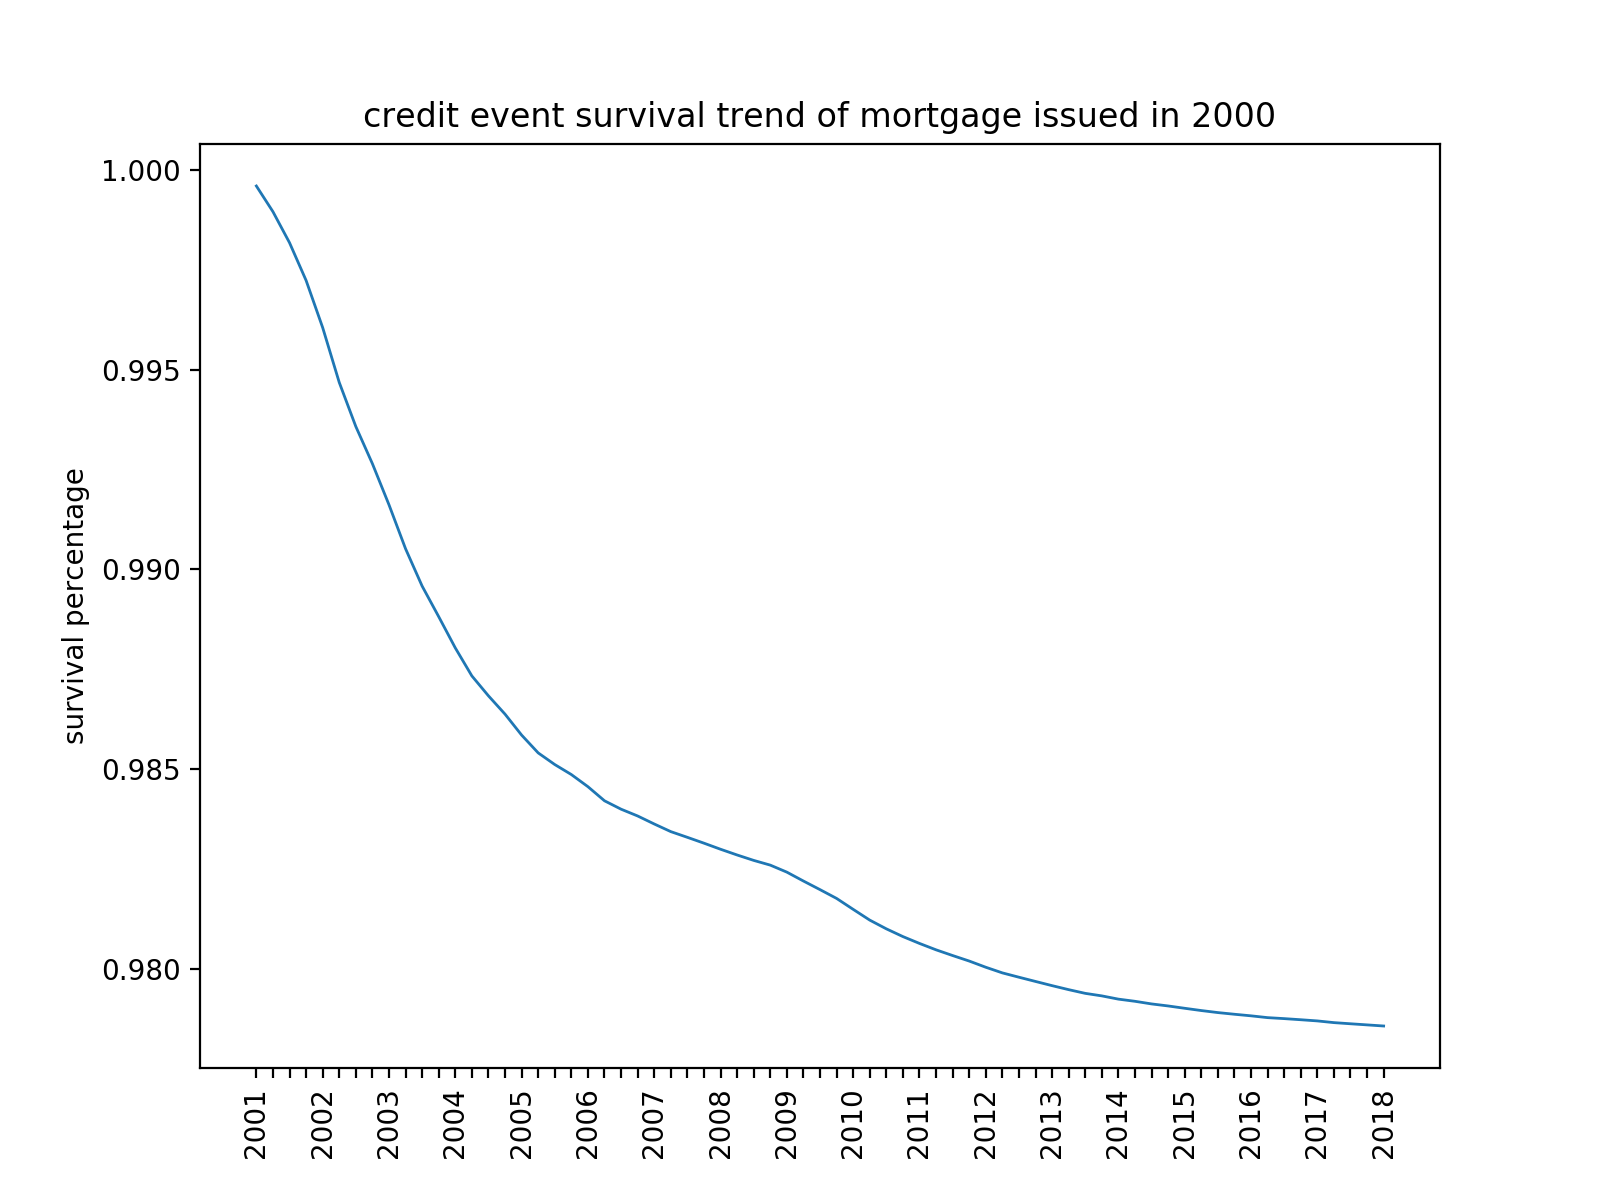

In [143]:
%matplotlib notebook
plt.figure(figsize=(8,6))
x = np.arange(len(time_period))
my_xticks = tick
plt.xticks(x,my_xticks)
plt.xticks(rotation=90)
plt.plot(x,fce_survival, '-',label = 'fce_survival',linewidth=1)
ax = plt.gca()
ax.set_ylabel('survival percentage')
ax.set_title('credit event survival trend of mortgage issued in 2000')
# plt.savefig('upb.pdf')
plt.savefig('credit event.pdf')

<IPython.core.display.Javascript object>


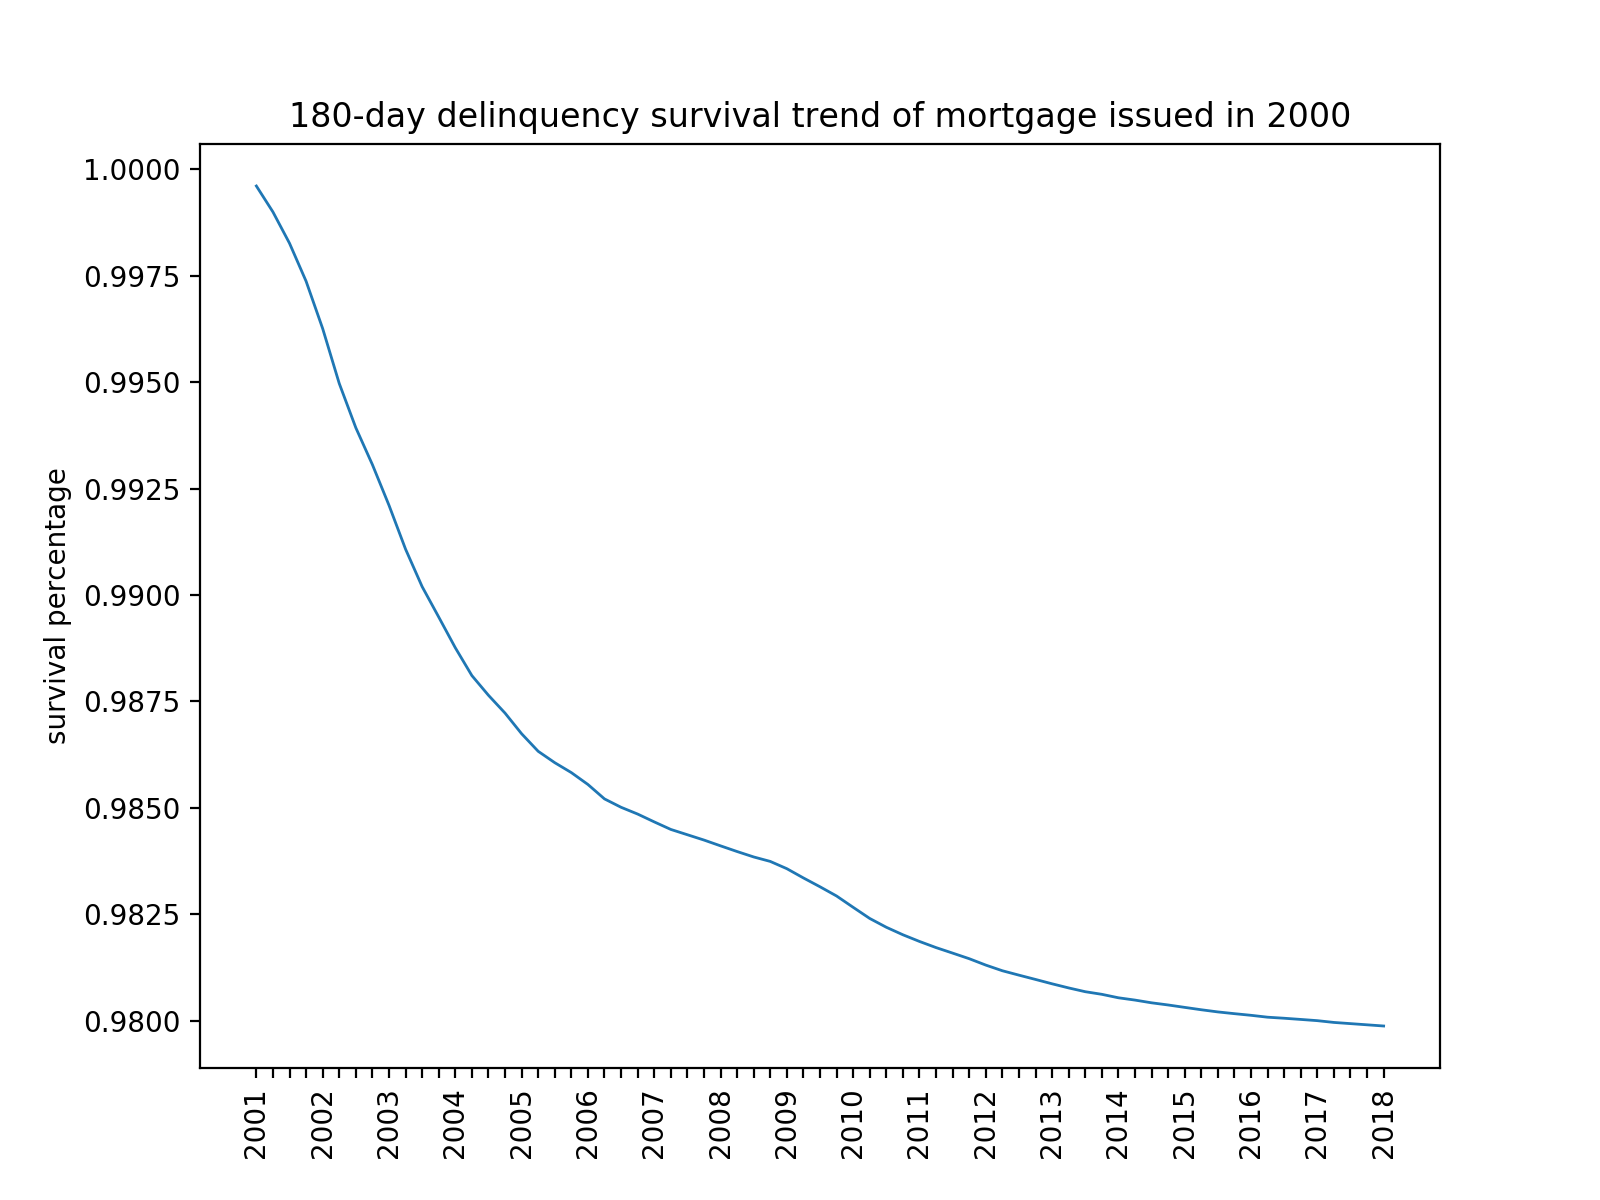

In [145]:
%matplotlib notebook
plt.figure(figsize=(8,6))
x = np.arange(len(time_period))
my_xticks = tick
plt.xticks(x,my_xticks)
plt.xticks(rotation=90)
plt.plot(x,f180_survival, '-',label = 'f180_survival',linewidth=1)
ax = plt.gca()
ax.set_ylabel('survival percentage')
ax.set_title('180-day delinquency survival trend of mortgage issued in 2000')
plt.savefig('180-day delinquency.pdf')